How to use:
Runtime -> Run all -> Select Image From Your Computer

Downloading the best model

In [1]:
!pip install gradio
!gdown --id 1fxCbAlmHARH_dk9iM1WKwMtG4KXrFttQ

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.4 MB/s eta 0:00:00
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1fxCbAlmHARH_dk9iM1WKwMtG4KXrFttQ
From (redirected): https://drive.google.com/uc?id=1fxCbAlmHARH_dk9iM1WKwMtG4KXrFttQ&confirm=t&uuid=22f409c5-1bb5-40bb-b11d-a93b11125a7a
To: /content/generator_inference.h5
100% 167M/167M [00:03<00:00, 50.9MB/s]

Imports

In [2]:
import gradio as gr
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.models import load_model

Load model

In [3]:
from tensorflow.keras.models import load_model

generator = load_model("generator_inference.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


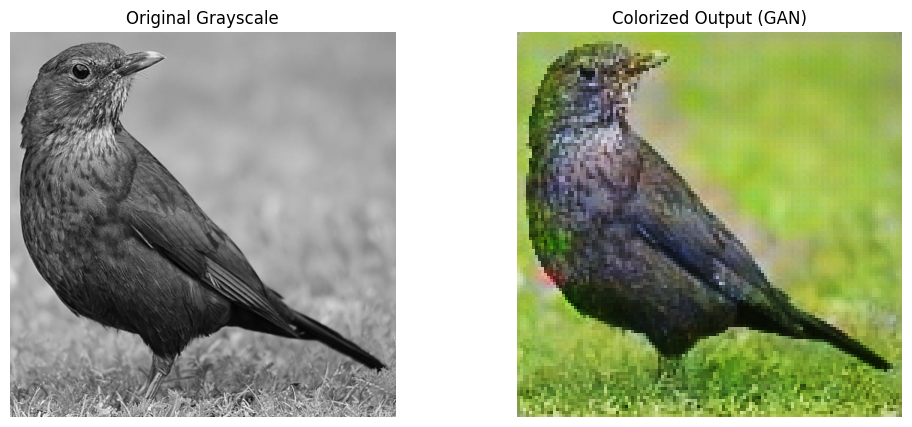

In [4]:
import cv2
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    """ Load and preprocess a grayscale image for GAN inference. """
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))
    img = img / 127.5 - 1
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)
    return img

def colorize_and_display(image_path):
    img_gray = preprocess_image(image_path)
    generated_img = generator.predict(img_gray)[0]
    generated_img = (generated_img + 1) / 2

    original_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    ax[0].imshow(original_gray, cmap="gray")
    ax[0].set_title("Original Grayscale")
    ax[0].axis("off")

    ax[1].imshow(generated_img)
    ax[1].set_title("Colorized Output (GAN)")
    ax[1].axis("off")

    plt.show()

colorize_and_display("(10).jpg")  # Replace with your grayscale image path
